# Sentiment Analysis

## Methods
- VADER (Valence Aware Dictionary and sEntiment Reasoner)
- Roberta
- Hugging face

In [45]:
from icecream import ic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

plt.style.use('ggplot')

In [46]:
# Read in data
df = pd.read_csv('Reviews.csv')

In [47]:
df = df.head(1000)
print(df.shape)

(1000, 10)


In [48]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0, 0.5, 'No of reviews')

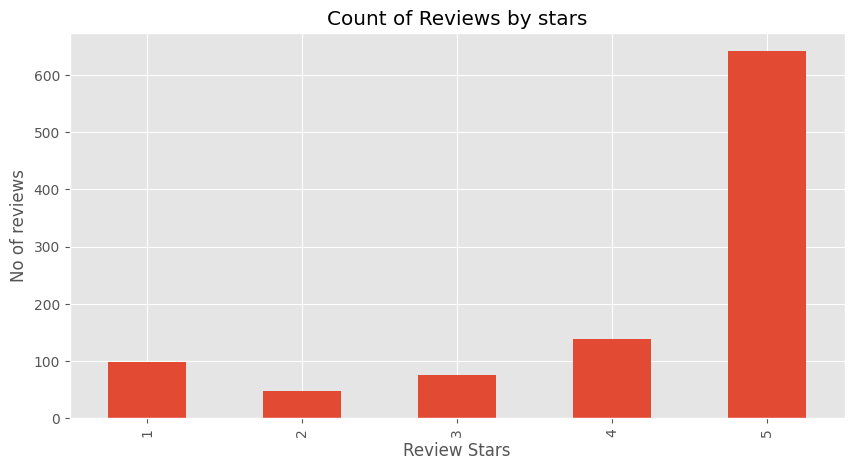

In [49]:
axis = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by stars', figsize = (10, 5))
axis.set_xlabel('Review Stars')
axis.set_ylabel('No of reviews')

## Basic NLTK

In [50]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
example = df['Text'][80]
print(example)

This peppermint stick is delicious and fun to eat.  My dad got me one for Christmas because he remembered me having a similar one when I was a little girl.  I'm 30 now and I love it!


In [52]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'peppermint',
 'stick',
 'is',
 'delicious',
 'and',
 'fun',
 'to',
 'eat',
 '.']

In [53]:
# part of speech (pos) tagging NN -> noun DT -> determiner etc..
pos_tagged = nltk.pos_tag(tokens)
pos_tagged[:10]

[('This', 'DT'),
 ('peppermint', 'NN'),
 ('stick', 'NN'),
 ('is', 'VBZ'),
 ('delicious', 'JJ'),
 ('and', 'CC'),
 ('fun', 'NN'),
 ('to', 'TO'),
 ('eat', 'VB'),
 ('.', '.')]

ic| entities: Tree('S', [('This', 'DT'), ('peppermint', 'NN'), ('stick', 'NN'), ('is', 'VBZ'), ('delicious', 'JJ'), ('and', 'CC'), ('fun', 'NN'), ('to', 'TO'), ('eat', 'VB'), ('.', '.'), ('My', 'PRP$'), ('dad', 'NN'), ('got', 'VBD'), ('me', 'PRP'), ('one', 'CD'), ('for', 'IN'), Tree('PERSON', [('Christmas', 'NNP')]), ('because', 'IN'), ('he', 'PRP'), ('remembered', 'VBD'), ('me', 'PRP'), ('having', 'VBG'), ('a', 'DT'), ('similar', 'JJ'), ('one', 'CD'), ('when', 'WRB'), ('I', 'PRP'), ('was', 'VBD'), ('a', 'DT'), ('little', 'JJ'), ('girl', 'NN'), ('.', '.'), ('I', 'PRP'), ("'m", 'VBP'), ('30', 'CD'), ('now', 'RB'), ('and', 'CC'), ('I', 'PRP'), ('love', 'VBP'), ('it', 'PRP'), ('!', '.')])


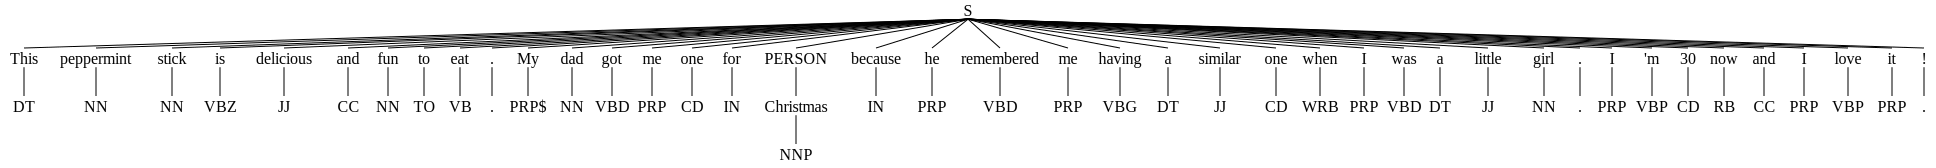

In [54]:
entities = nltk.chunk.ne_chunk(pos_tagged)
ic(entities)

## VADER 
Using `SentimentIntensityAnalyzer` to get negative / neutral / positive scores of the text.
- Uses bag of words
  - Stop words removed
  - Score of each word is combined to form a total score
  - Does not take into consideration the context of the sentence.

In [55]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [56]:
ic(sia.polarity_scores('I love you!'))
ic(sia.polarity_scores('I hate you!'))

ic| sia.polarity_scores('I love you!'): {'compound': 0.6696, 'neg': 0.0, 'neu': 0.182, 'pos': 0.818}
ic| sia.polarity_scores('I hate you!'): {'compound': -0.6114, 'neg': 0.8, 'neu': 0.2, 'pos': 0.0}


{'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.6114}

In [57]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9098}

In [58]:
# create polarity scores for each review in the dataset
res = {}
for i, row in df.iterrows():
    text = row["Text"]
    rev_id = row["Id"]
    res[rev_id] = sia.polarity_scores(text)

In [59]:
# convert into dataframe, reset and rename the index and merge with the original dataframe
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [60]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plot vader results

Text(0.5, 1.0, 'Compound score by amazon star reviews')

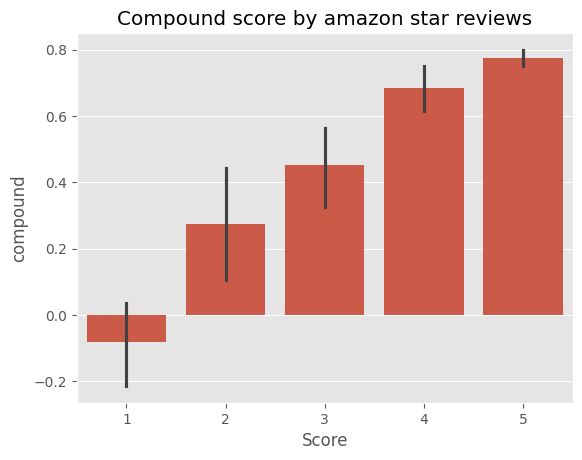

In [61]:
# using seaborn for creating a bar plot
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound score by amazon star reviews')

Text(0.5, 1.0, 'Negative')

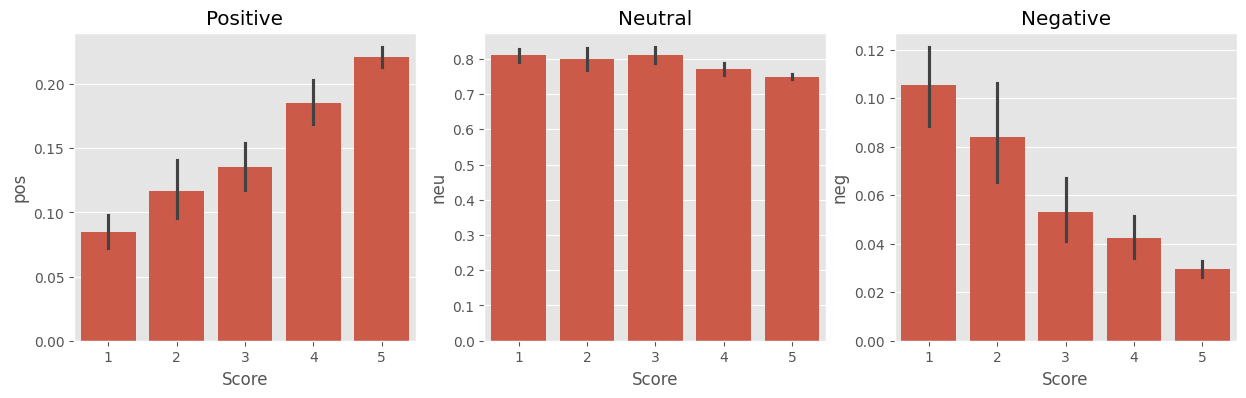

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.barplot(data=vaders, x="Score", y='pos', ax=axs[0])
sns.barplot(data=vaders, x="Score", y='neu', ax=axs[1])
sns.barplot(data=vaders, x="Score", y='neg', ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")

## Roberta Model 
- Uses a model that has been trained with a corpus of data
- Transformer model accounts for the words and also the context related to other words

In [63]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [64]:
# downloa pretrained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [65]:
# VADER results
print(example)
sia.polarity_scores(example)

This peppermint stick is delicious and fun to eat.  My dad got me one for Christmas because he remembered me having a similar one when I was a little girl.  I'm 30 now and I love it!


{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9098}

In [66]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta-neg': scores[0],
        'roberta-neu': scores[1],
        'roberta-pos': scores[2]
    }
    return scores_dict

In [67]:
# create polarity scores for each review in the dataset
res = {}
vader_result = {}
for i, row in df.iterrows():
    try:
        text = row["Text"]
        rev_id = row["Id"]
        vader_result[rev_id] = sia.polarity_scores(text)

        vader_result_renamed = {}
        for key, value in vader_result[i+1].items():
            vader_result_renamed[f'vader_{key}'] = value

        roberta_result = polarity_scores_roberta(text)
        combined = vader_result_renamed | roberta_result
        res[rev_id] = combined
    except RuntimeError:
        print(f"Broke for id : {rev_id}")

Broke for id : 83
Broke for id : 187
Broke for id : 529
Broke for id : 540
Broke for id : 746
Broke for id : 863


In [68]:
combined

{'vader_neg': 0.027,
 'vader_neu': 0.939,
 'vader_pos': 0.034,
 'vader_compound': -0.1027,
 'roberta-neg': 0.8084938,
 'roberta-neu': 0.16971043,
 'roberta-pos': 0.021795718}

In [69]:
# convert into dataframe, reset and rename the index and merge with the original dataframe
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare scorers between the models

In [70]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta-neg,roberta-neu,roberta-pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


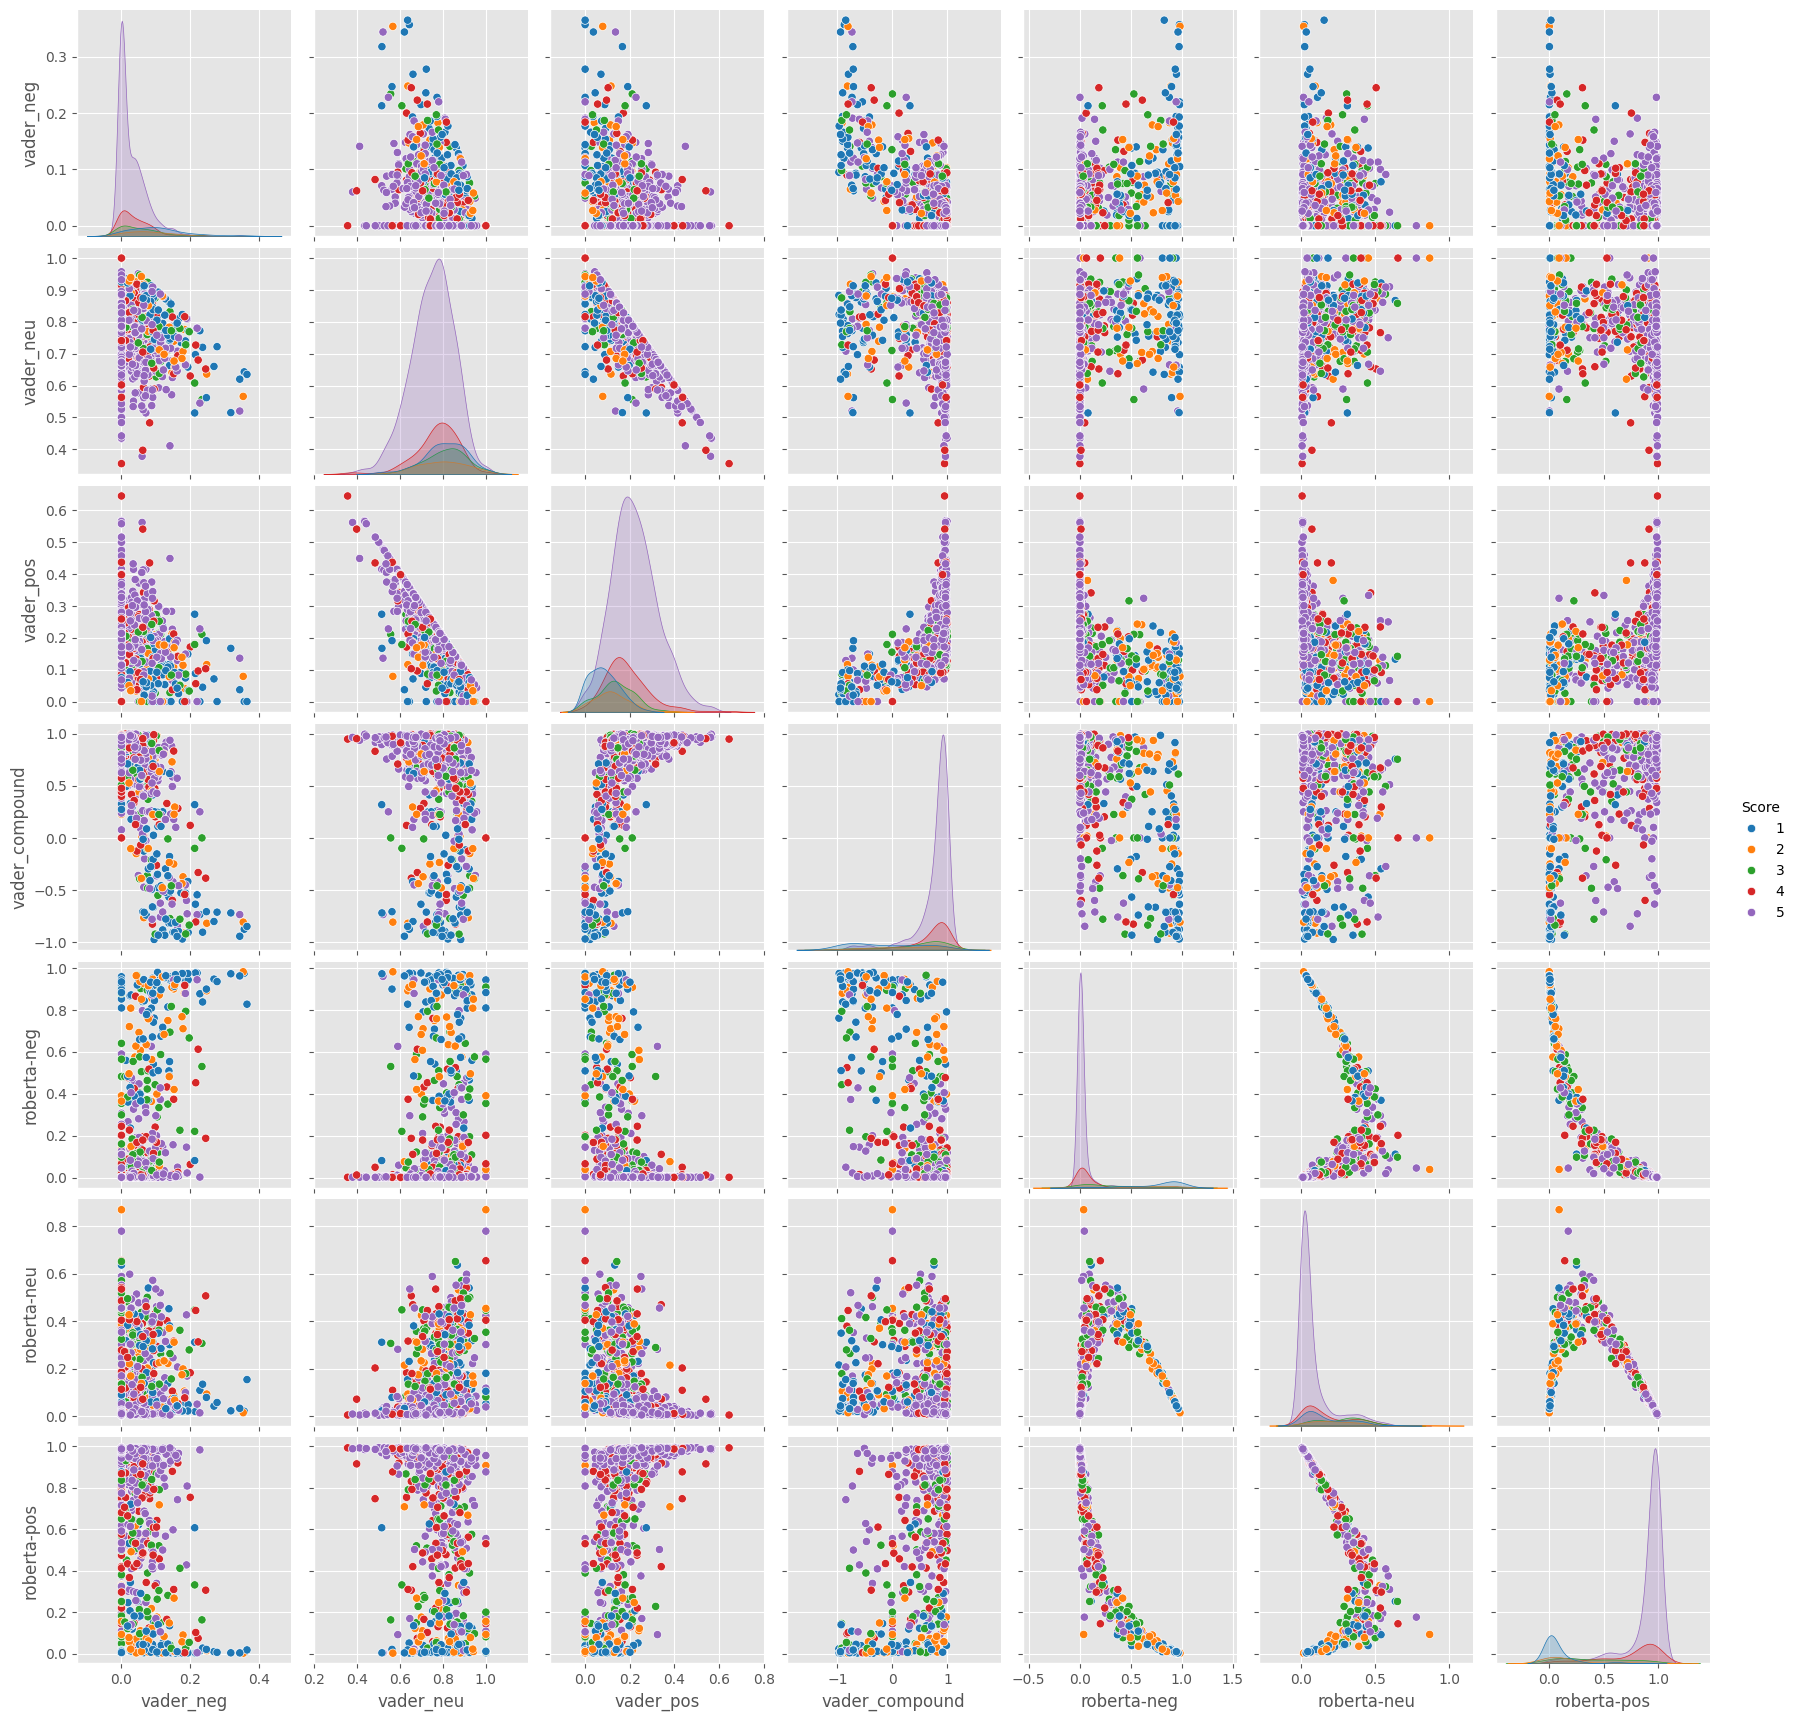

In [71]:
sns.pairplot(data=results_df, vars=[ 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta-neg', 'roberta-neu', 'roberta-pos'],
       hue= 'Score',
       palette='tab10')

## Transformers Pipeline

In [72]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [73]:
sentiment_pipeline('I hate rachel! She is so rude!')

[{'label': 'NEGATIVE', 'score': 0.9990386962890625}]

In [74]:
sentiment_pipeline('I love desserts like ice cream and gulab jamun')

[{'label': 'POSITIVE', 'score': 0.9968222379684448}]